In [2]:
from tensorflow import keras
from keras import layers

import pandas as pd
import numpy as np

In [3]:
from utils import dataset

In [10]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.activations import relu
from keras.optimizers import Adam
from keras.losses import mean_squared_error

model = keras.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(160,320,3)),
    Conv2D(3, (5,5), strides=2, padding="same", activation=relu),
    Conv2D(24, (5, 5), strides=2, padding="same", activation=relu),
    Conv2D(36, (3, 3), strides=2, padding="same", activation=relu),
    Conv2D(48, (3, 3), strides=2, padding="same", activation=relu),
    Conv2D(64, (3, 3), strides=2, padding="same", activation=relu),
    Flatten(),
    Dense(100, activation=relu),
    Dense(50, activation=relu),
    Dense(10, activation=relu),
    Dense(1, activation="tanh"),

])

model.compile(loss=mean_squared_error, optimizer=Adam(0.00001), metrics=['mean_squared_error'])


In [11]:
train_csv='/home/tyler/Desktop/testObjLab/autopilot_project/data_set/train_data/driving_log.csv'
test_csv = '/home/tyler/Desktop/testObjLab/autopilot_project/data_set/test_data/driving_log.csv'
batchSize = 32
train_ds=dataset(train_csv, batchsize=batchSize)
test_ds = dataset(test_csv, batchsize=batchSize)

In [12]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="myModel.h5",
        save_best_only=True
    ),

    keras.callbacks.EarlyStopping(monitor='loss',patience=5,mode='min'),
]
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
    callbacks=callbacks)


Epoch 1/20
556/556 [==============================] - 21s 36ms/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 2/20
556/556 [==============================] - 22s 39ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 3/20
556/556 [==============================] - 23s 41ms/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 4/20
556/556 [==============================] - 24s 42ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 5/20
556/556 [==============================] - 23s 41ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 6/20
556/556 [==============================] - 23s 42ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 7/20
556/5

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 160, 320, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 80, 160, 3)        228       
                                                                 
 conv2d_6 (Conv2D)           (None, 40, 80, 24)        1824      
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 40, 36)        21636     
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 20, 48)        15600     
                                                                 
 conv2d_9 (Conv2D)           (None, 5, 10, 64)         27712     
                                                                 
 flatten_1 (Flatten)         (None, 3200)             

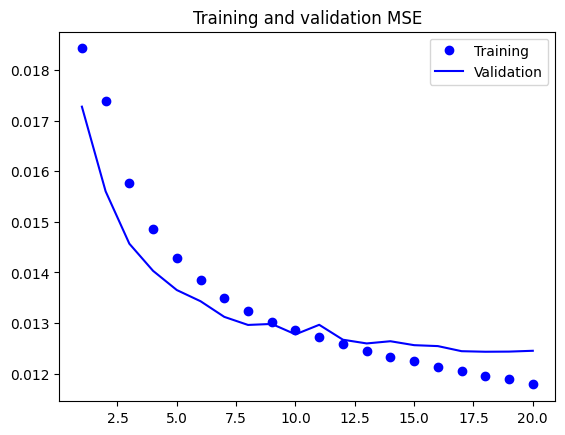

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history["mean_squared_error"]
val_accuracy = history.history["val_mean_squared_error"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training")
plt.plot(epochs, val_accuracy, "b", label="Validation")
plt.title("Training and validation MSE")
plt.legend()
plt.figure()
plt.show()
